<a href="https://colab.research.google.com/github/NSworks/Knowledge-Engineering/blob/main/s19048_12c_PRO8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rozbuduj sieć konwolucyjną z projektu 6 do autokodera, poprzez usunięcie warstw klasyfikujących i dodanie symetrycznych warstw *Conv2DTranspose*. Przystosuj sieć do wykorzystania danych mnist (Ręcznie pisane cyfry).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


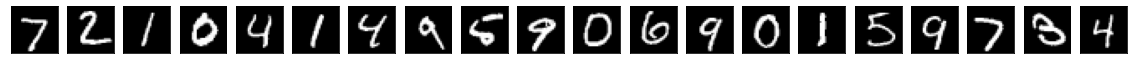

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(20):
    ax = plt.subplot(2, 20, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Przykład autoencodera

In [ ]:
from keras.layers import Input, Dense
from keras import Model, utils

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 20)                220       
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


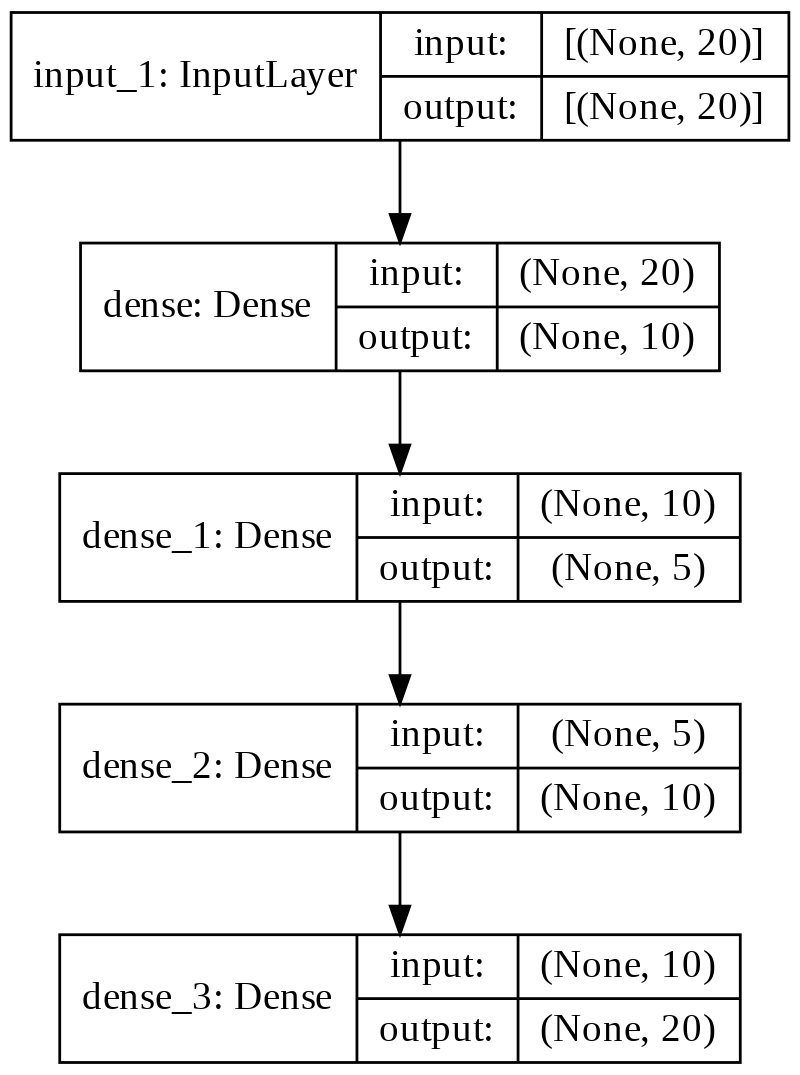

In [ ]:
inputs = Input(20)
encoded_1 = Dense(10)(inputs)
encoded = Dense(5, activation='relu')(encoded_1)
decoded_1 = Dense(10)(encoded)
decoded = Dense(20, activation='sigmoid')(decoded_1)

auto_encoder = Model(inputs, decoded)
auto_encoder.compile()
auto_encoder.summary()
utils.plot_model(auto_encoder, show_shapes=True, dpi=200)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


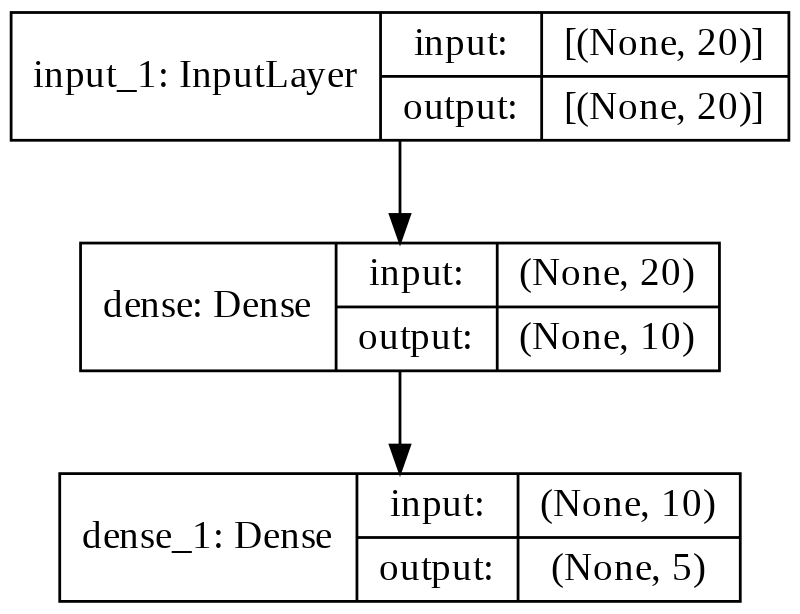

In [ ]:
encoder = Model(inputs, encoded)
encoder.summary()
utils.plot_model(encoder, show_shapes=True, dpi=200)

# Wytrenuj model używając jedynie danych wejściowych, wyjście modelu równa się jego wejściu.

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 28, 28, 32)        924

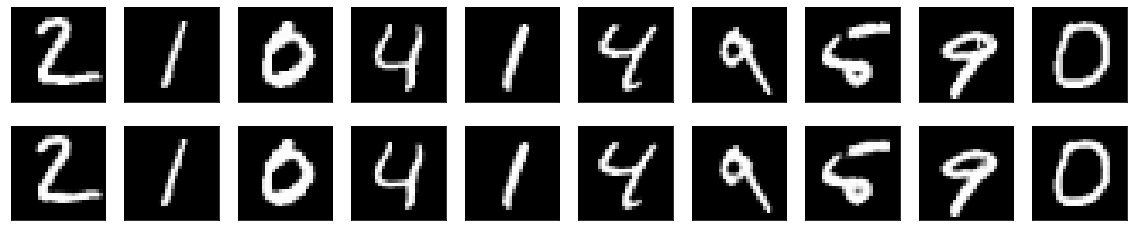

In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


input_img = keras.Input(shape=(28, 28, 1))


# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoded)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = keras.Model(input_img, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

encoder = keras.Model(input_img, x)
encoded_imgs = encoder.predict(x_test)


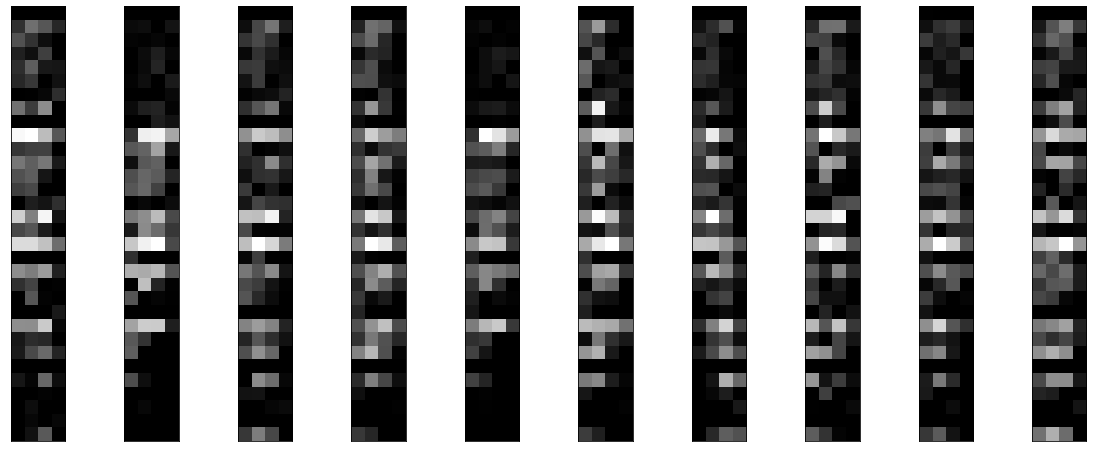

In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
decoded_imgs = autoencoder.predict(x_test)
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Zaprezentuj na danych testowych jak wyglądają dane wejściowe, dane zwrócone przez encoder i dane wyjściowe.

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 9s 8ms/step - loss: 0.3879 - val_loss: 0.1907
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1802 - val_loss: 0.1535
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1494 - val_loss: 0.1336
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1314 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1201 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1126 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1074 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1034 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1001 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss:

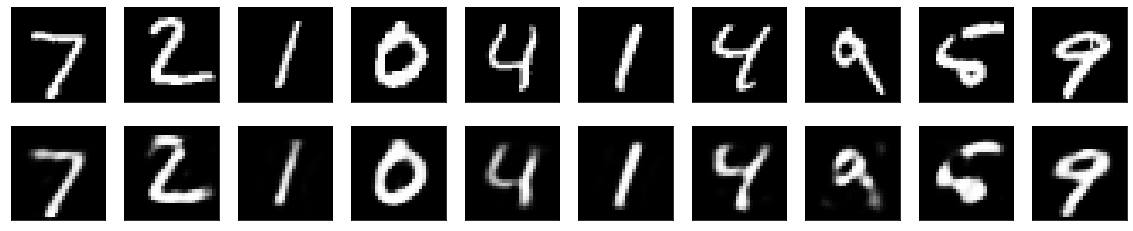

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()